## Linear Model: Adaline
### Adaline (ADAptive LInear NEuron)
> Adaline was developed to improve Perceptron.

> The main difference between the two is that a Perceptron takes a <font color='blue'>binary response</font> (unit step function) and computes an error used to update the weights, whereas an Adaline uses a <font color='blue'>continous response</font> value to update weights (before the binarized output is produced).

> The fact that the Adaline does this allows its updates to be more repesentative of the actual error, before it is thresholded, which in turn allows a model to converge more quickly.

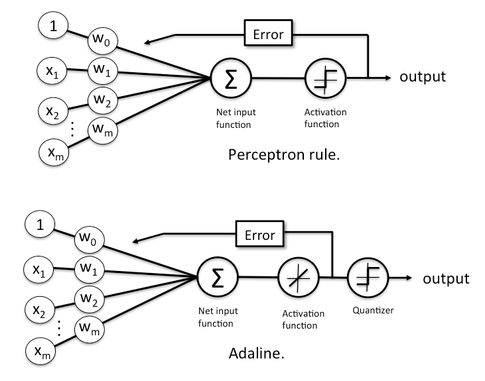

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from my_ml_tools.my_ml_plot import Plot_decision_regions
import warnings
warnings.simplefilter('ignore')
from IPython.display import Image
Image(filename = './charts/Adaline.png', width=400)

#### Net-Input function $z = w^T X$

#### Linear activation function $\phi(z)$:   
> $\phi(z) = \phi(w^T x) = w^T x$
  
#### Threshold (Decision) function or Quantizer for 2-class classification:    
> $ \hat{y} =
  \begin{cases}
    1 \text{  (positive)}    & \quad \text{if } \phi(x^T X)  \geq 0.5\\
    0 \text{  (negative)}    & \quad \text{otherwise}
  \end{cases}$

### (Batch) Gradient Descent
#### Cost function (Objective function): SSE
> #### Sum of Squared Errors (SSE):   
> $J(w) = \frac{1}{2} \sum_i (y^{(i)} - \phi(z^{(i)}))^2$    
> $\phi(z^{(i)}) = \phi(w^T x^{(i)}) = w^T x^{(i)}$: output of activation function

> SSE is a <font color='blue'>convex</font> function, we can "climbe down a hill" to find the global minimal value of the cost function.

> #### Update $w$ to minimize $J(w)$   
>> $w := w + \Delta w$   
>>  $w := w - \eta \nabla J(w)$, $\eta$: learning rate

> $\frac{\partial J}{\partial w_j} = -\sum_i (y^{(i)} - \phi(z^{(i)})) x_j^{(i)}$

> $\Delta w_j = -\eta \frac{\partial J}{\partial w_j} = \eta \sum_i (y^{(i)} - \phi(z^{(i)})) x_j^{(i)}$
> #### All weights need to be updated simultaneously.

(0.0, 1.0, 0.0, 1.0)

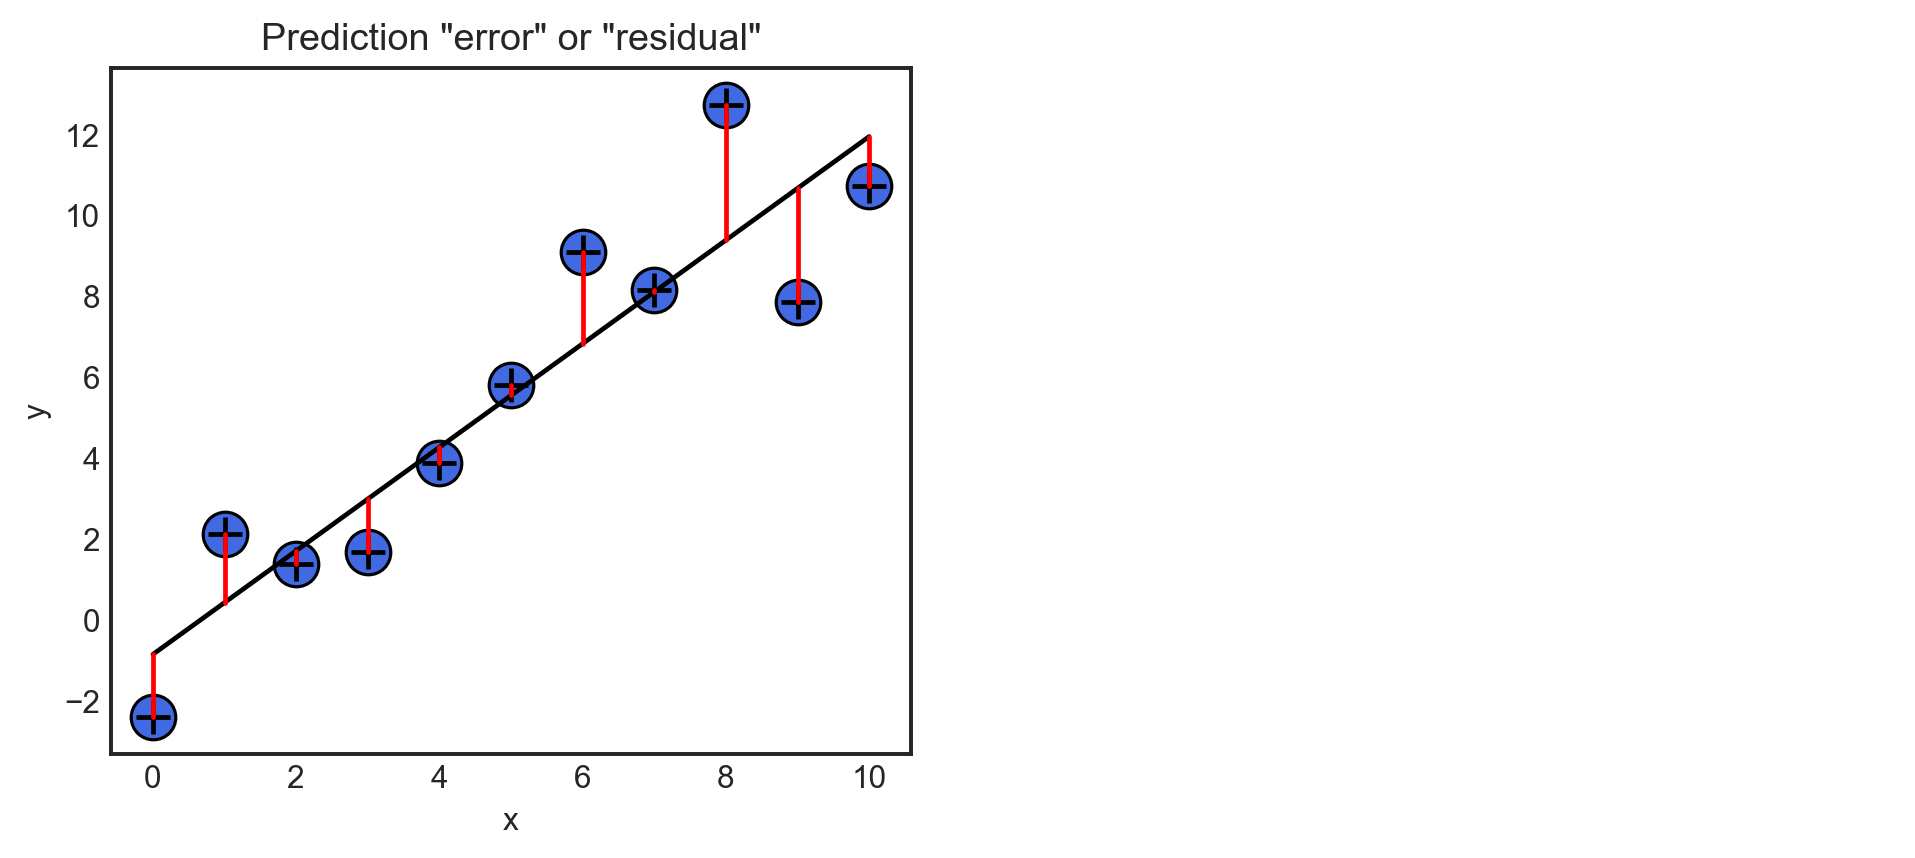

In [2]:
n_points = 11
x = np.linspace(0, 10, n_points)
y = x + np.random.randn(n_points) * 2

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x.reshape(-1, 1), y)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
axes[0].scatter(x, y, marker= 'o', s=200, c='royalblue', edgecolor='k')
axes[0].scatter(x, y, marker= '+', s=120, c='k')
axes[0].plot(x, x * reg.coef_[0] + reg.intercept_, c='k')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

for i in range(n_points):
    axes[0].plot([x[i], x[i]], [y[i], x[i] * reg.coef_[0] + reg.intercept_], c='red')
axes[0].set_title('Prediction "error" or "residual"')
axes[1].axis('off')

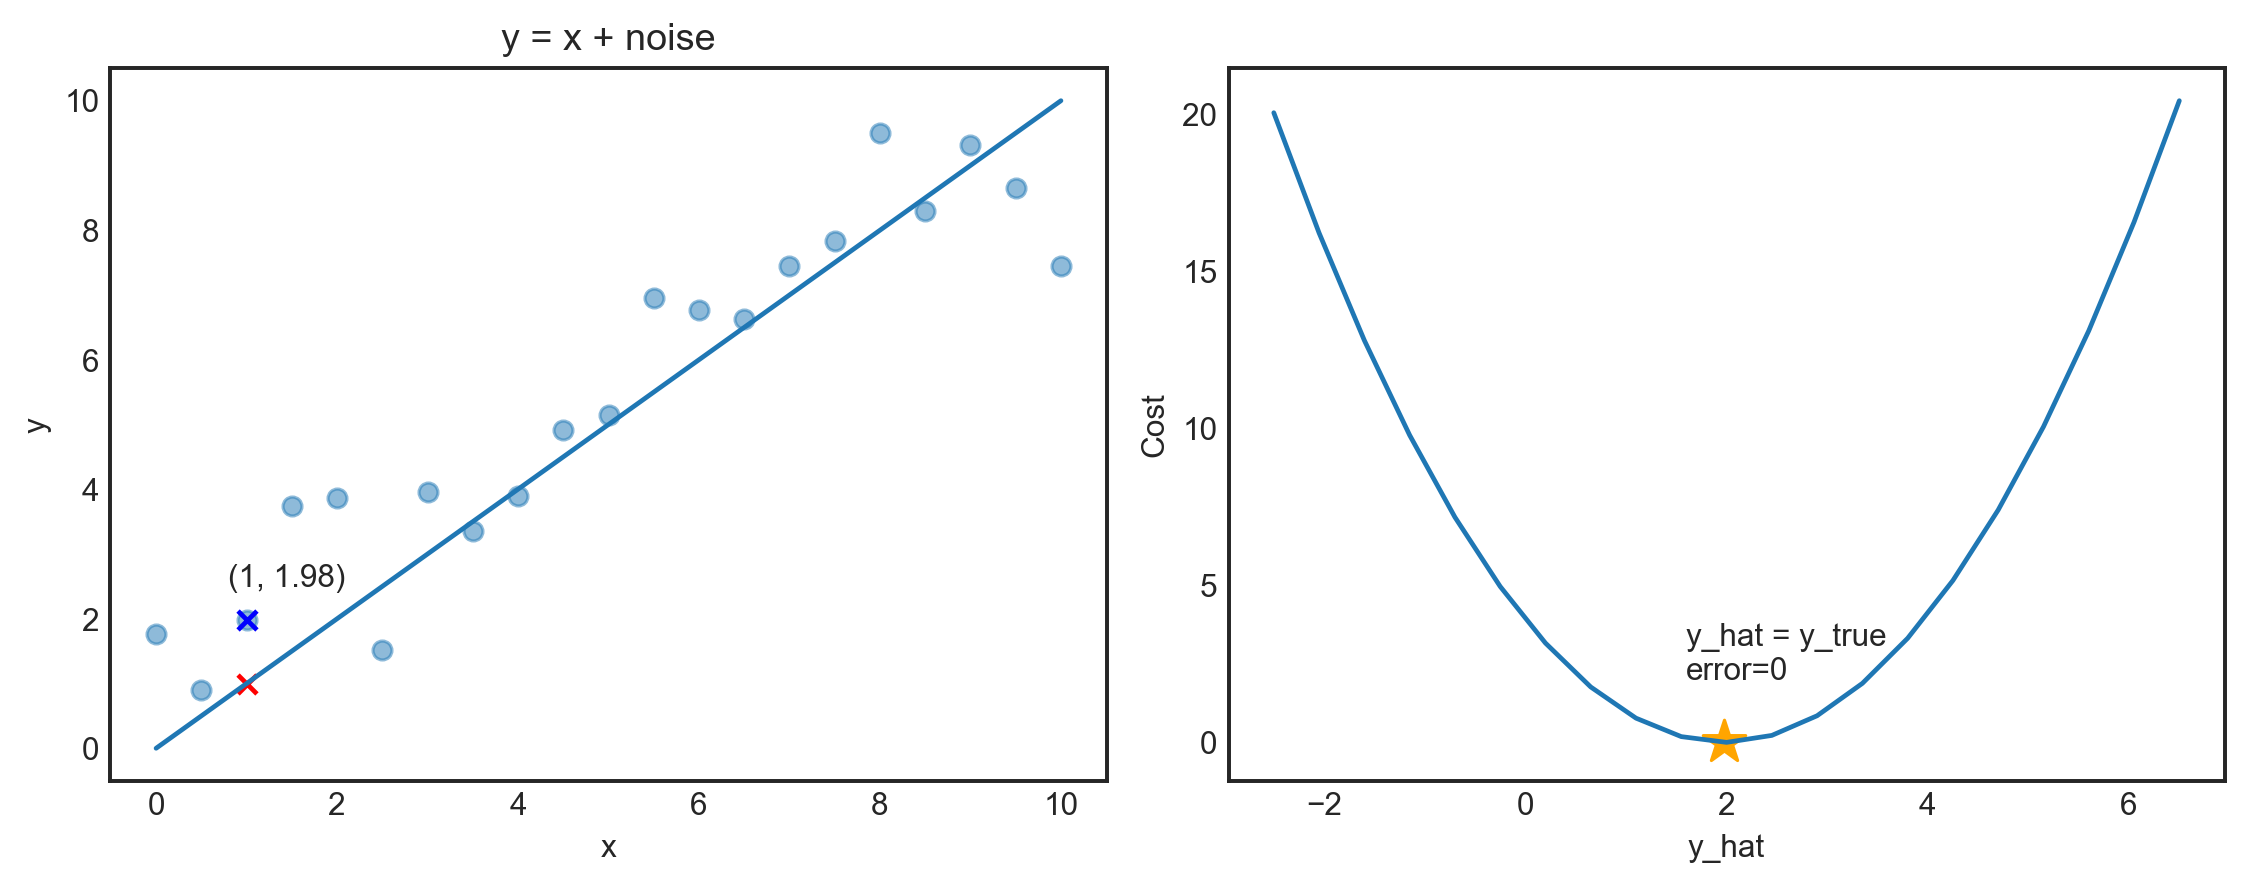

In [3]:
fig, ax = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
ax = ax.ravel()
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 21)
y = x + rng.randn(21)
ax[0].scatter(x, y, alpha=0.5)
ax[0].plot(x, x)
x_true = 1
y_true = 1.97873798
ax[0].scatter(1, 1, marker='x', c='red')
ax[0].scatter(x_true, y_true, marker='x', c='blue')
ax[0].annotate(f'({x_true}, {y_true:.2f})', (0.8, 2.5))
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('y = x + noise')

ax[1].plot(np.linspace(-2.5, 6.5, 21), (np.linspace(-2.5, 6.5, 21) - y_true) **2)
ax[1].scatter(y_true, 0, marker='*', s=200, c='orange')
ax[1].annotate(f'y_hat = y_true\nerror=0', (1.6, 2))
ax[1].set_xlabel('y_hat')
ax[1].set_ylabel('Cost')
plt.tight_layout()

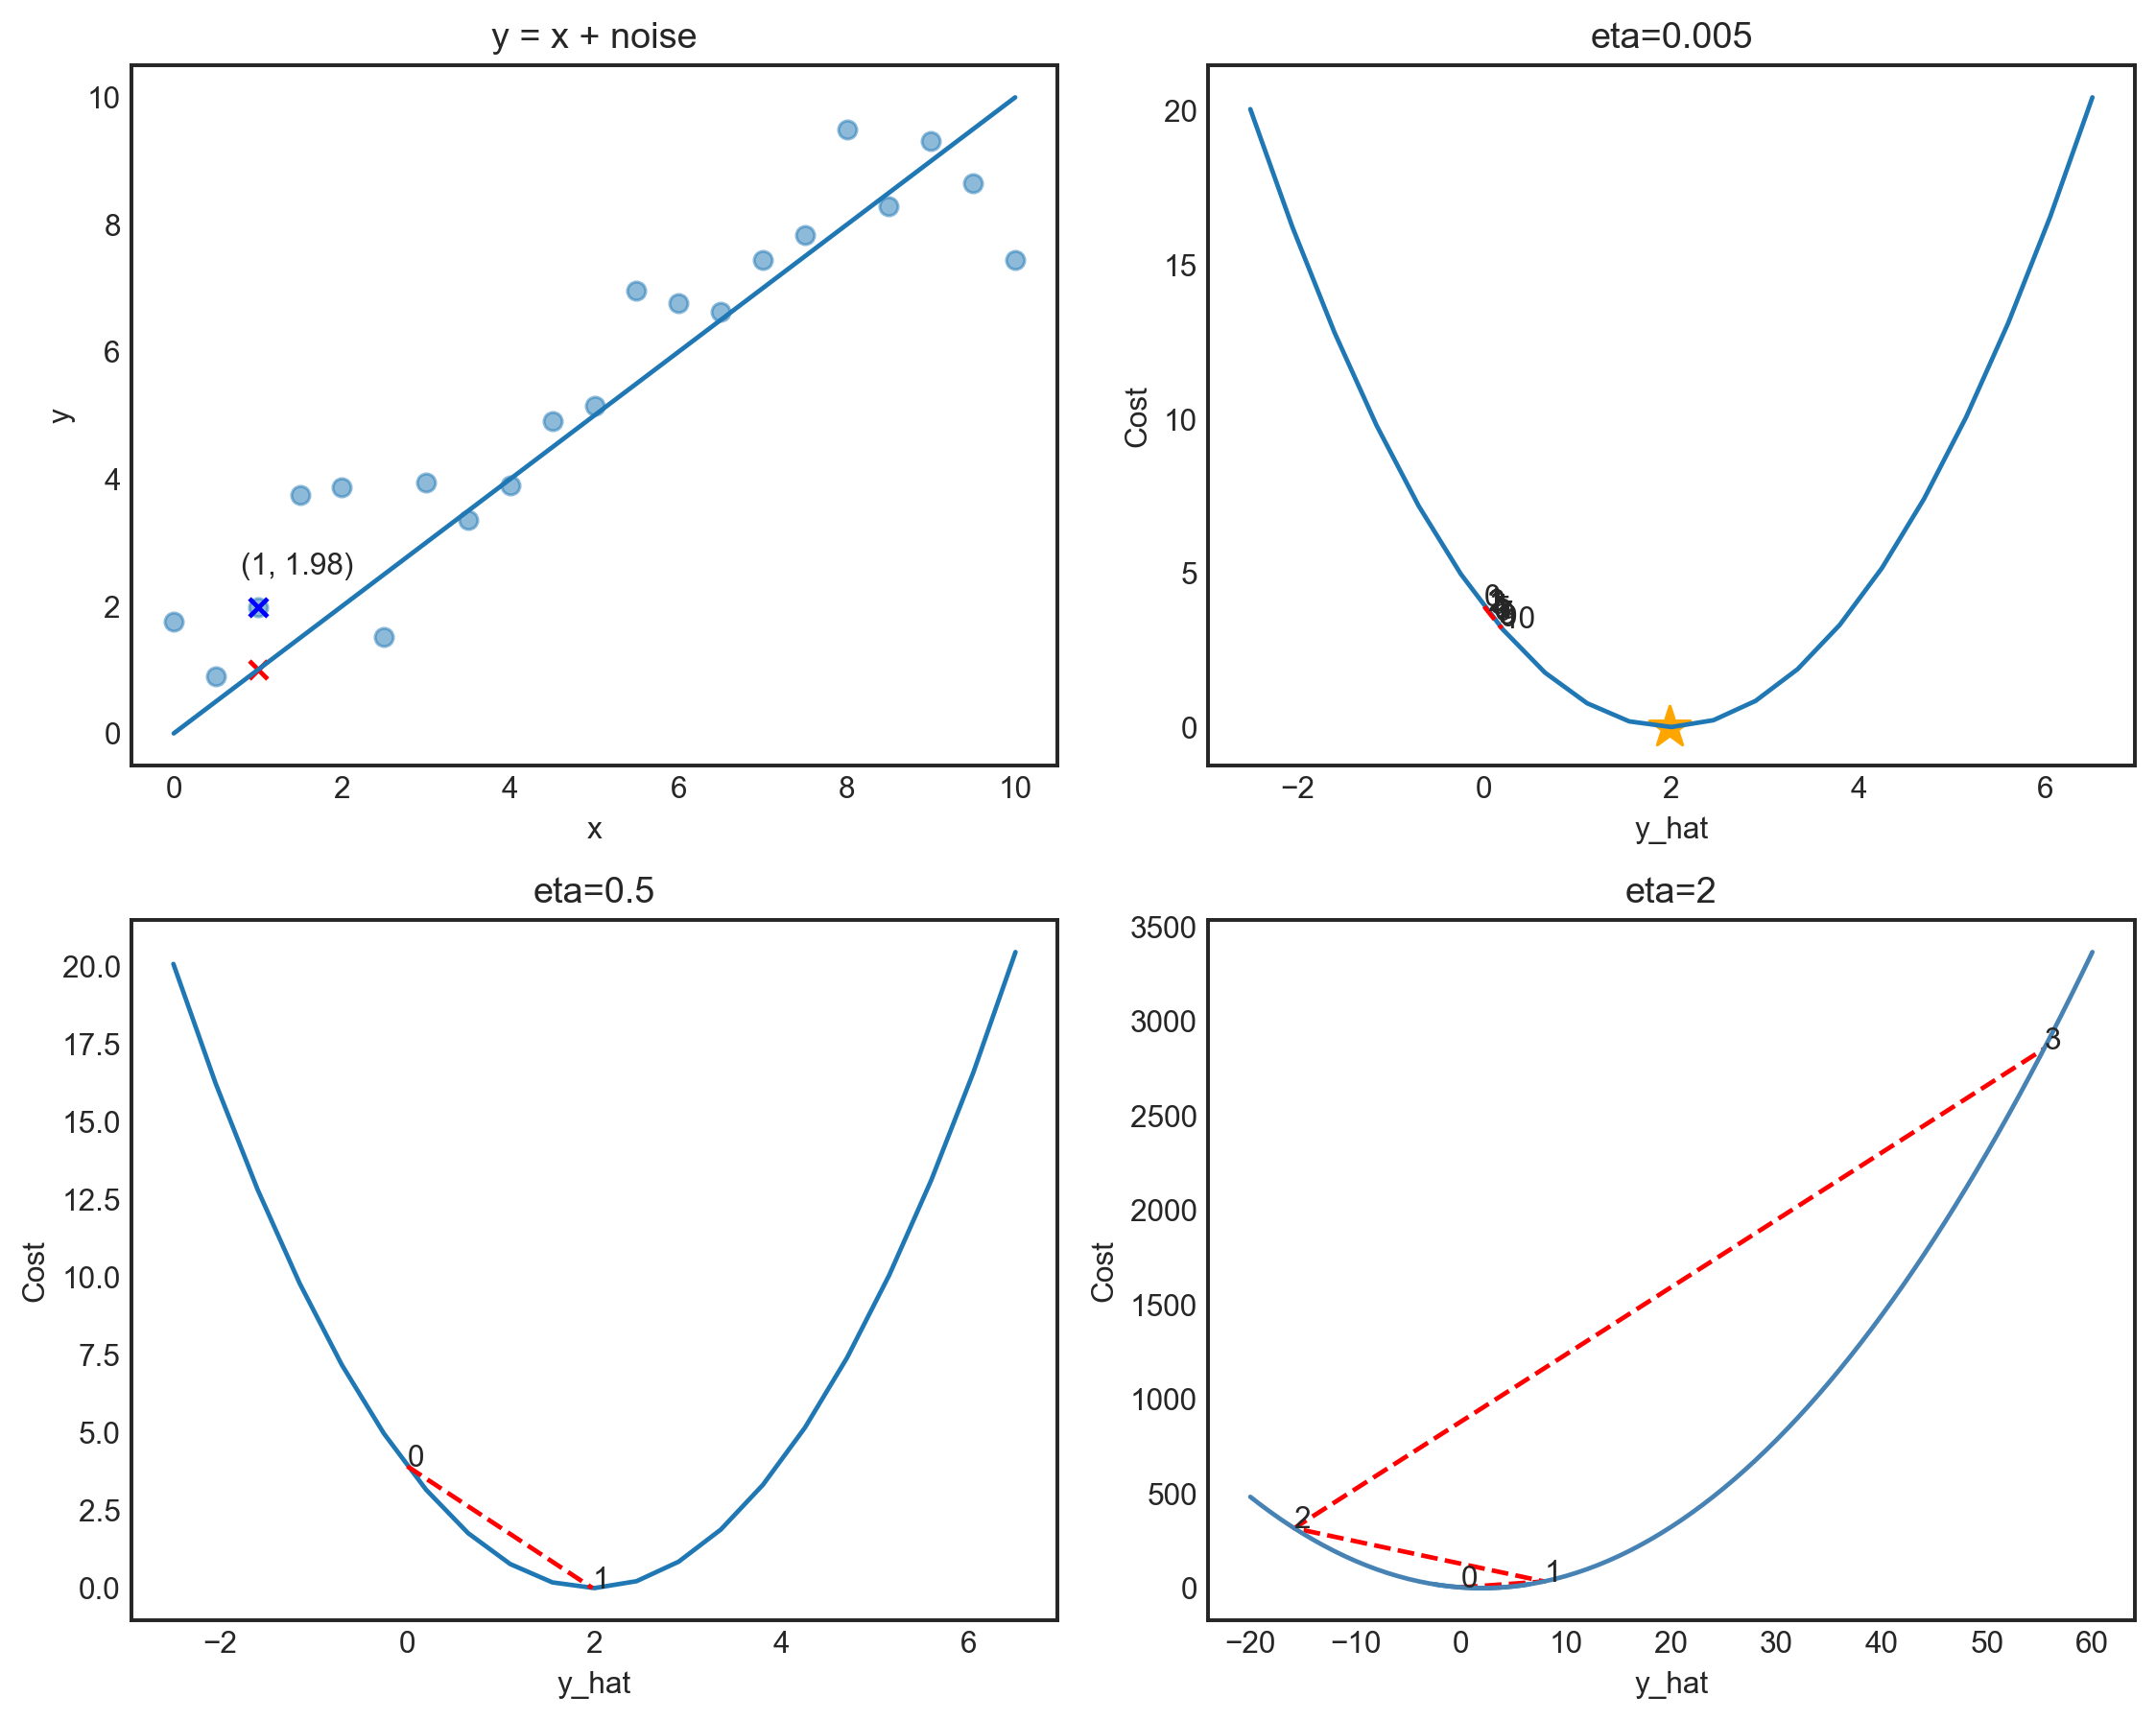

In [4]:
fig, ax = plt.subplots(2, 2, dpi=227, figsize=(10, 8))
ax = ax.ravel()
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 21)
y = x + rng.randn(21)
ax[0].scatter(x, y, alpha=0.5)
ax[0].plot(x, x)
x_true = 1
y_true = 1.97873798
ax[0].scatter(1, 1, marker='x', c='red')
ax[0].scatter(x_true, y_true, marker='x', c='blue')
ax[0].annotate(f'({x_true}, {y_true:.2f})', (0.8, 2.5))
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('y = x + noise')

def move_n_steps(x_true, y_true, eta, ax, n):
    # squared errors
    ax.plot(np.linspace(-2.5, 6.5, 21), (np.linspace(-2.5, 6.5, 21) - y_true) **2)
    
    w = np.zeros(2)
    y_hat = 0
    #ax.scatter(y_hat, (y_hat - y_true)**2)
    ax.annotate('0', (y_hat, (y_hat - y_true)**2))
    xx = [y_hat]
    yy = [(y_hat - y_true)**2]
    for i in range(1, n+1):
        w0 = w
        w[0] = w0[0] + eta * (y_true - y_hat)
        w[1] = w0[1] + eta * (y_true - y_hat) * x_true
        y_hat = w[0] + w[1] * x_true
        xx.append(y_hat)
        yy.append((y_hat - y_true)**2)
        #ax.scatter(y_hat, (y_hat - y_true)**2)
        ax.annotate(str(i), (y_hat, (y_hat - y_true)**2))
    ax.plot(xx, yy, 'r--')
    ax.set_xlabel('y_hat')
    ax.set_ylabel('Cost')
    ax.set_title(f'eta={eta}')

move_n_steps(x_true, y_true, eta=0.005, ax=ax[1], n=10)
move_n_steps(x_true, y_true, eta=0.5, ax=ax[2], n=1)
ax[1].scatter(y_true, 0, marker='*', s=200, color='orange')
move_n_steps(x_true, y_true, eta=2, ax=ax[3], n=3)
ax[3].plot(np.linspace(-20, 60, 81), (np.linspace(-20, 60, 81) - y_true) **2, c='steelblue')

plt.tight_layout()

In [5]:
class myAdaline:
    def __init__(self, eta=1e-3, max_iter=1e3, random_state=0):
        self.eta = eta
        self.max_iter = int(max_iter)
        self.random_state = random_state

    def fit(self, X, y):
        X1 = np.c_[np.ones(X.shape[0]), X]
        rng = np.random.RandomState(self.random_state)
        self.w_ = rng.normal(loc=0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = [self.cost(X, y)]
    
        for i in range(self.max_iter):
            self.w_ += self.eta * X1.T.dot(y - np.dot(X1, self.w_))
            self.cost_.append(self.cost(X, y))
        return self
    
    def net_input(self, X):
        return np.dot(np.c_[np.ones(X.shape[0]), X], self.w_)
    
    def activation(self, z):
        return z
        
    def cost(self, X, y):
        J = 0.5 * np.sum(np.square(y - self.activation(self.net_input(X))))
        return J
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
    def score(self, X, y):
        return (self.predict(X) == y).sum() / y.size

### Example-1A: Student Score (use myAdaline)
#### Lineat Regression

[2.47644491 9.77697018]


(0.0, 1.0, 0.0, 1.0)

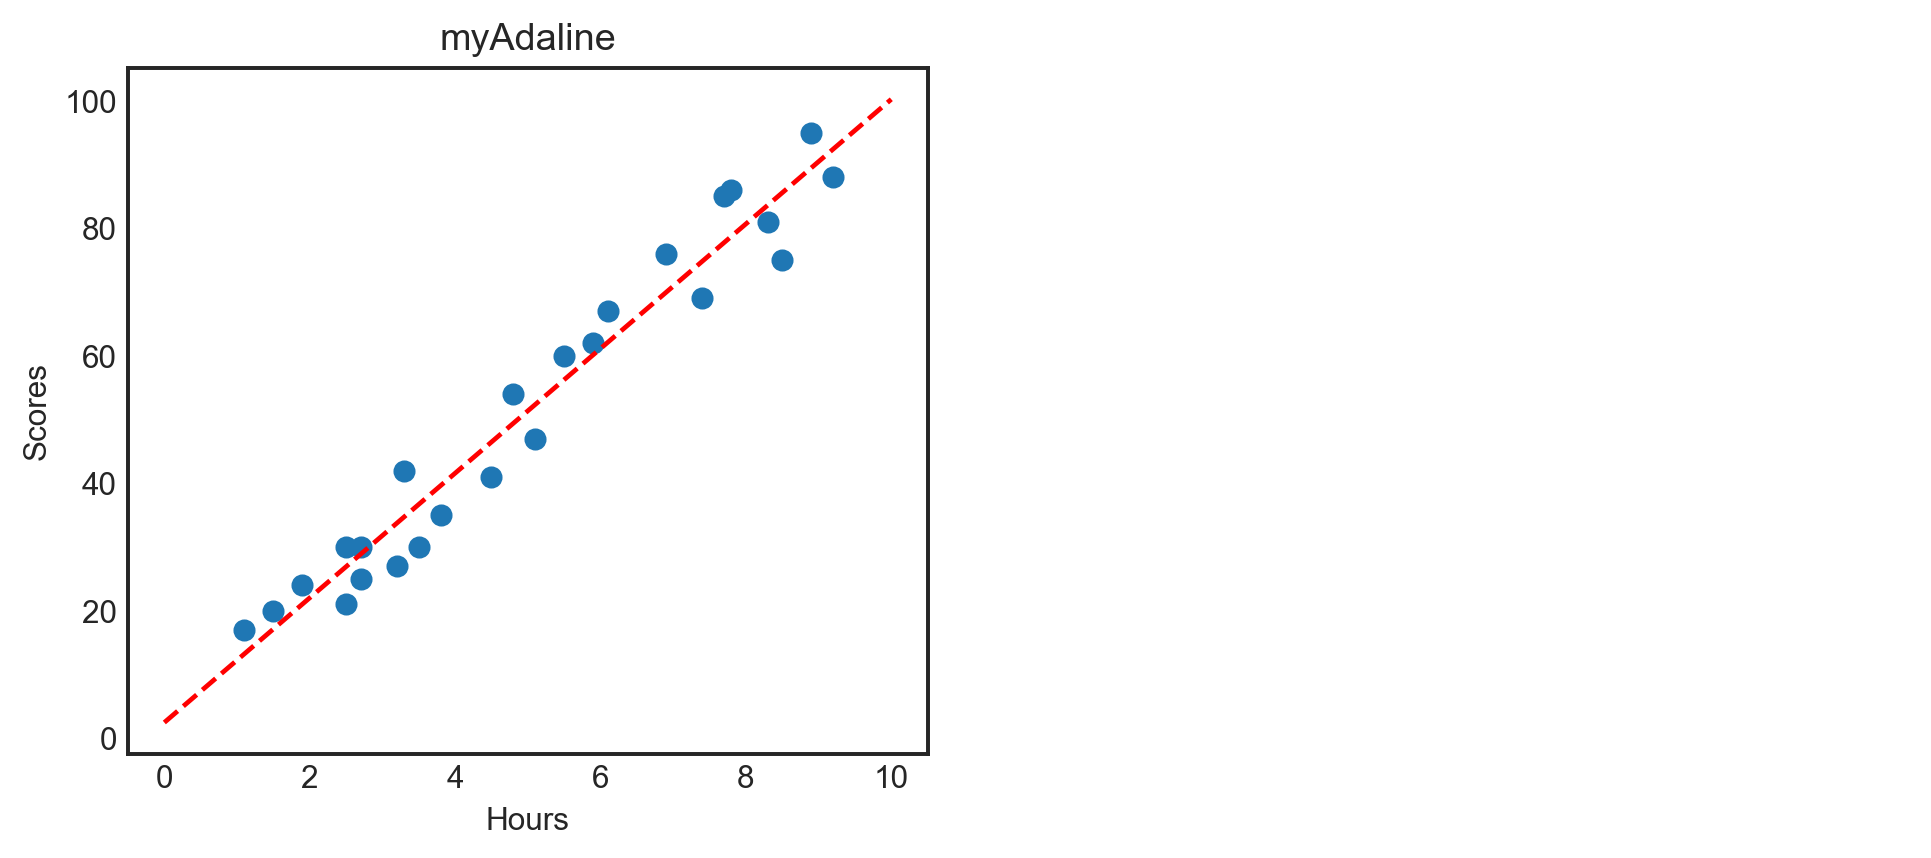

In [6]:
df = pd.read_csv('./data/student_score.csv')
X1 = df['Hours'].values.reshape(-1, 1)
y1 = df['Scores'].values

clf = myAdaline()
clf.fit(X1, y1)
print(clf.w_)

fig, ax = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
ax[0].scatter(X1, y1)
ax[0].plot(np.linspace(0, 10, 100), clf.w_[0] + np.linspace(0, 10, 100) * clf.w_[1], 'r--')
ax[0].set_xlabel(df.columns[0])
ax[0].set_ylabel(df.columns[1])
ax[0].set_title('myAdaline')
ax[1].axis('off')

### Example-1B: Student Score (use sklearn.linear_model.LinearRegression)
#### Lineat Regression

2.483673405373196 [9.77580339]


(0.0, 1.0, 0.0, 1.0)

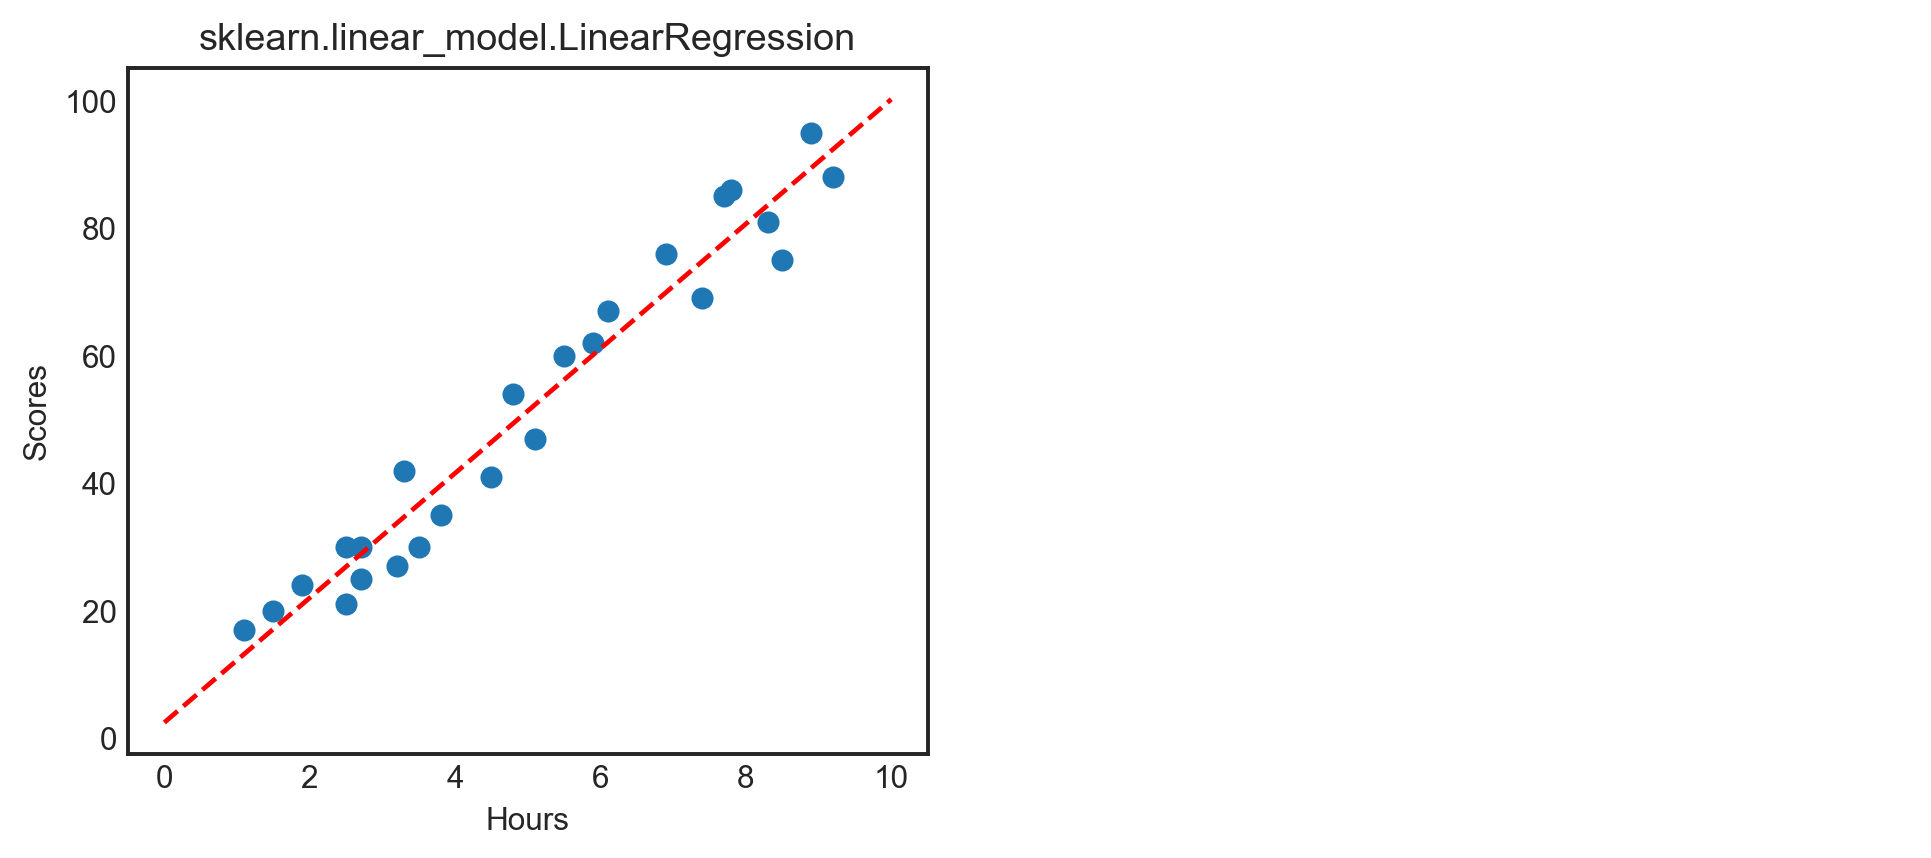

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X1.reshape(-1, 1), y1)
print(reg.intercept_, reg.coef_)

fig, ax = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
ax[0].scatter(X1, y1)

line = np.linspace(0, 10, 100)
ax[0].plot(line, reg.predict(line.reshape(-1, 1)), 'r--')
ax[0].set_xlabel(df.columns[0])
ax[0].set_ylabel(df.columns[1])
ax[0].set_title('sklearn.linear_model.LinearRegression')
ax[1].axis('off')

### Example-2A: Iris (use myAdaline)
#### Classification: 2 features, 2 classes
(original dataset contain 4 features and 3 classes)

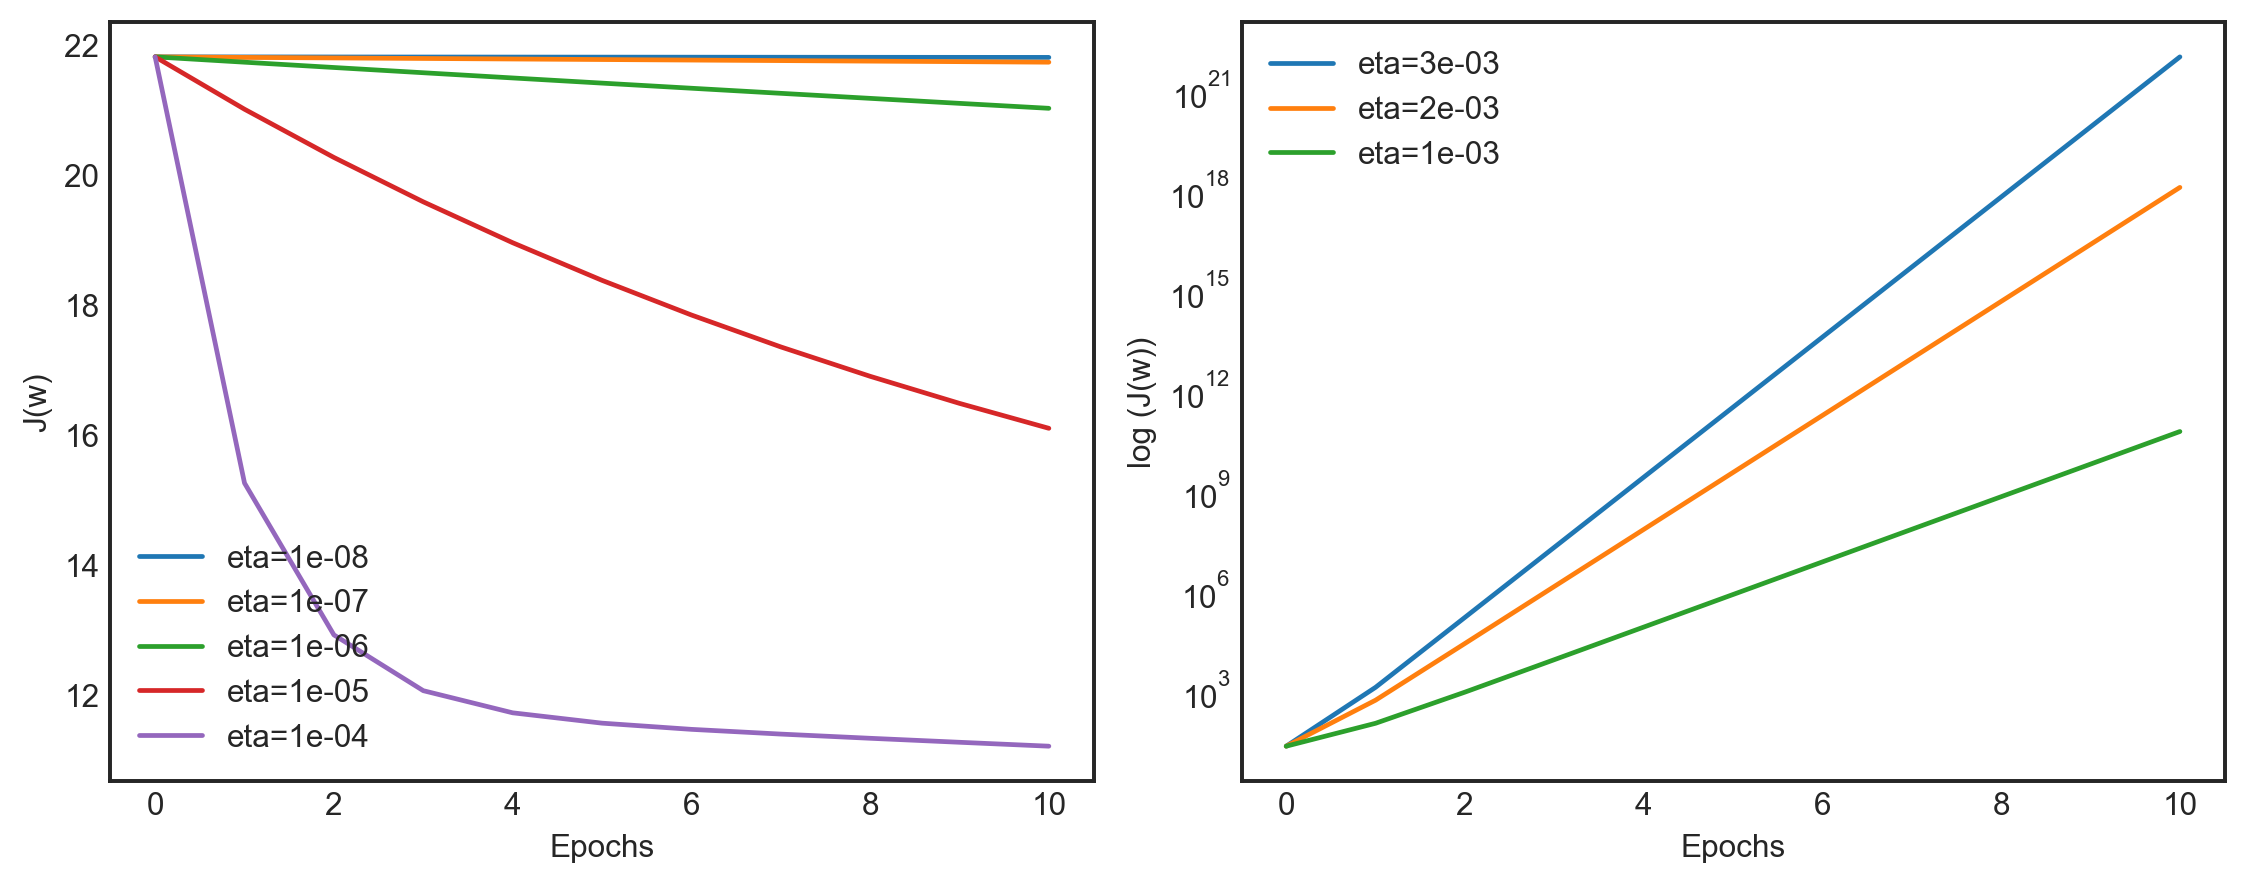

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
X2 = iris.data[:100, :2]
y2 = iris.target[:100]

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
etas = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
max_iter = 10
for eta in etas:
    clf = myAdaline(eta=eta, max_iter=max_iter)
    clf.fit(X2, y2)
    axes[0].plot(range(len(clf.cost_)), clf.cost_, label=f'eta={eta:.0e}')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('J(w)')
axes[0].legend()

etas = [3e-3, 2e-3, 1e-3]
max_iter = 10
for eta in etas:
    clf = myAdaline(eta=eta, max_iter=max_iter)
    clf.fit(X2, y2)
    axes[1].plot(range(len(clf.cost_)), clf.cost_, label=f'eta={eta:.0e}')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('log (J(w))')
axes[1].legend()
axes[1].set_yscale('log')
plt.tight_layout()

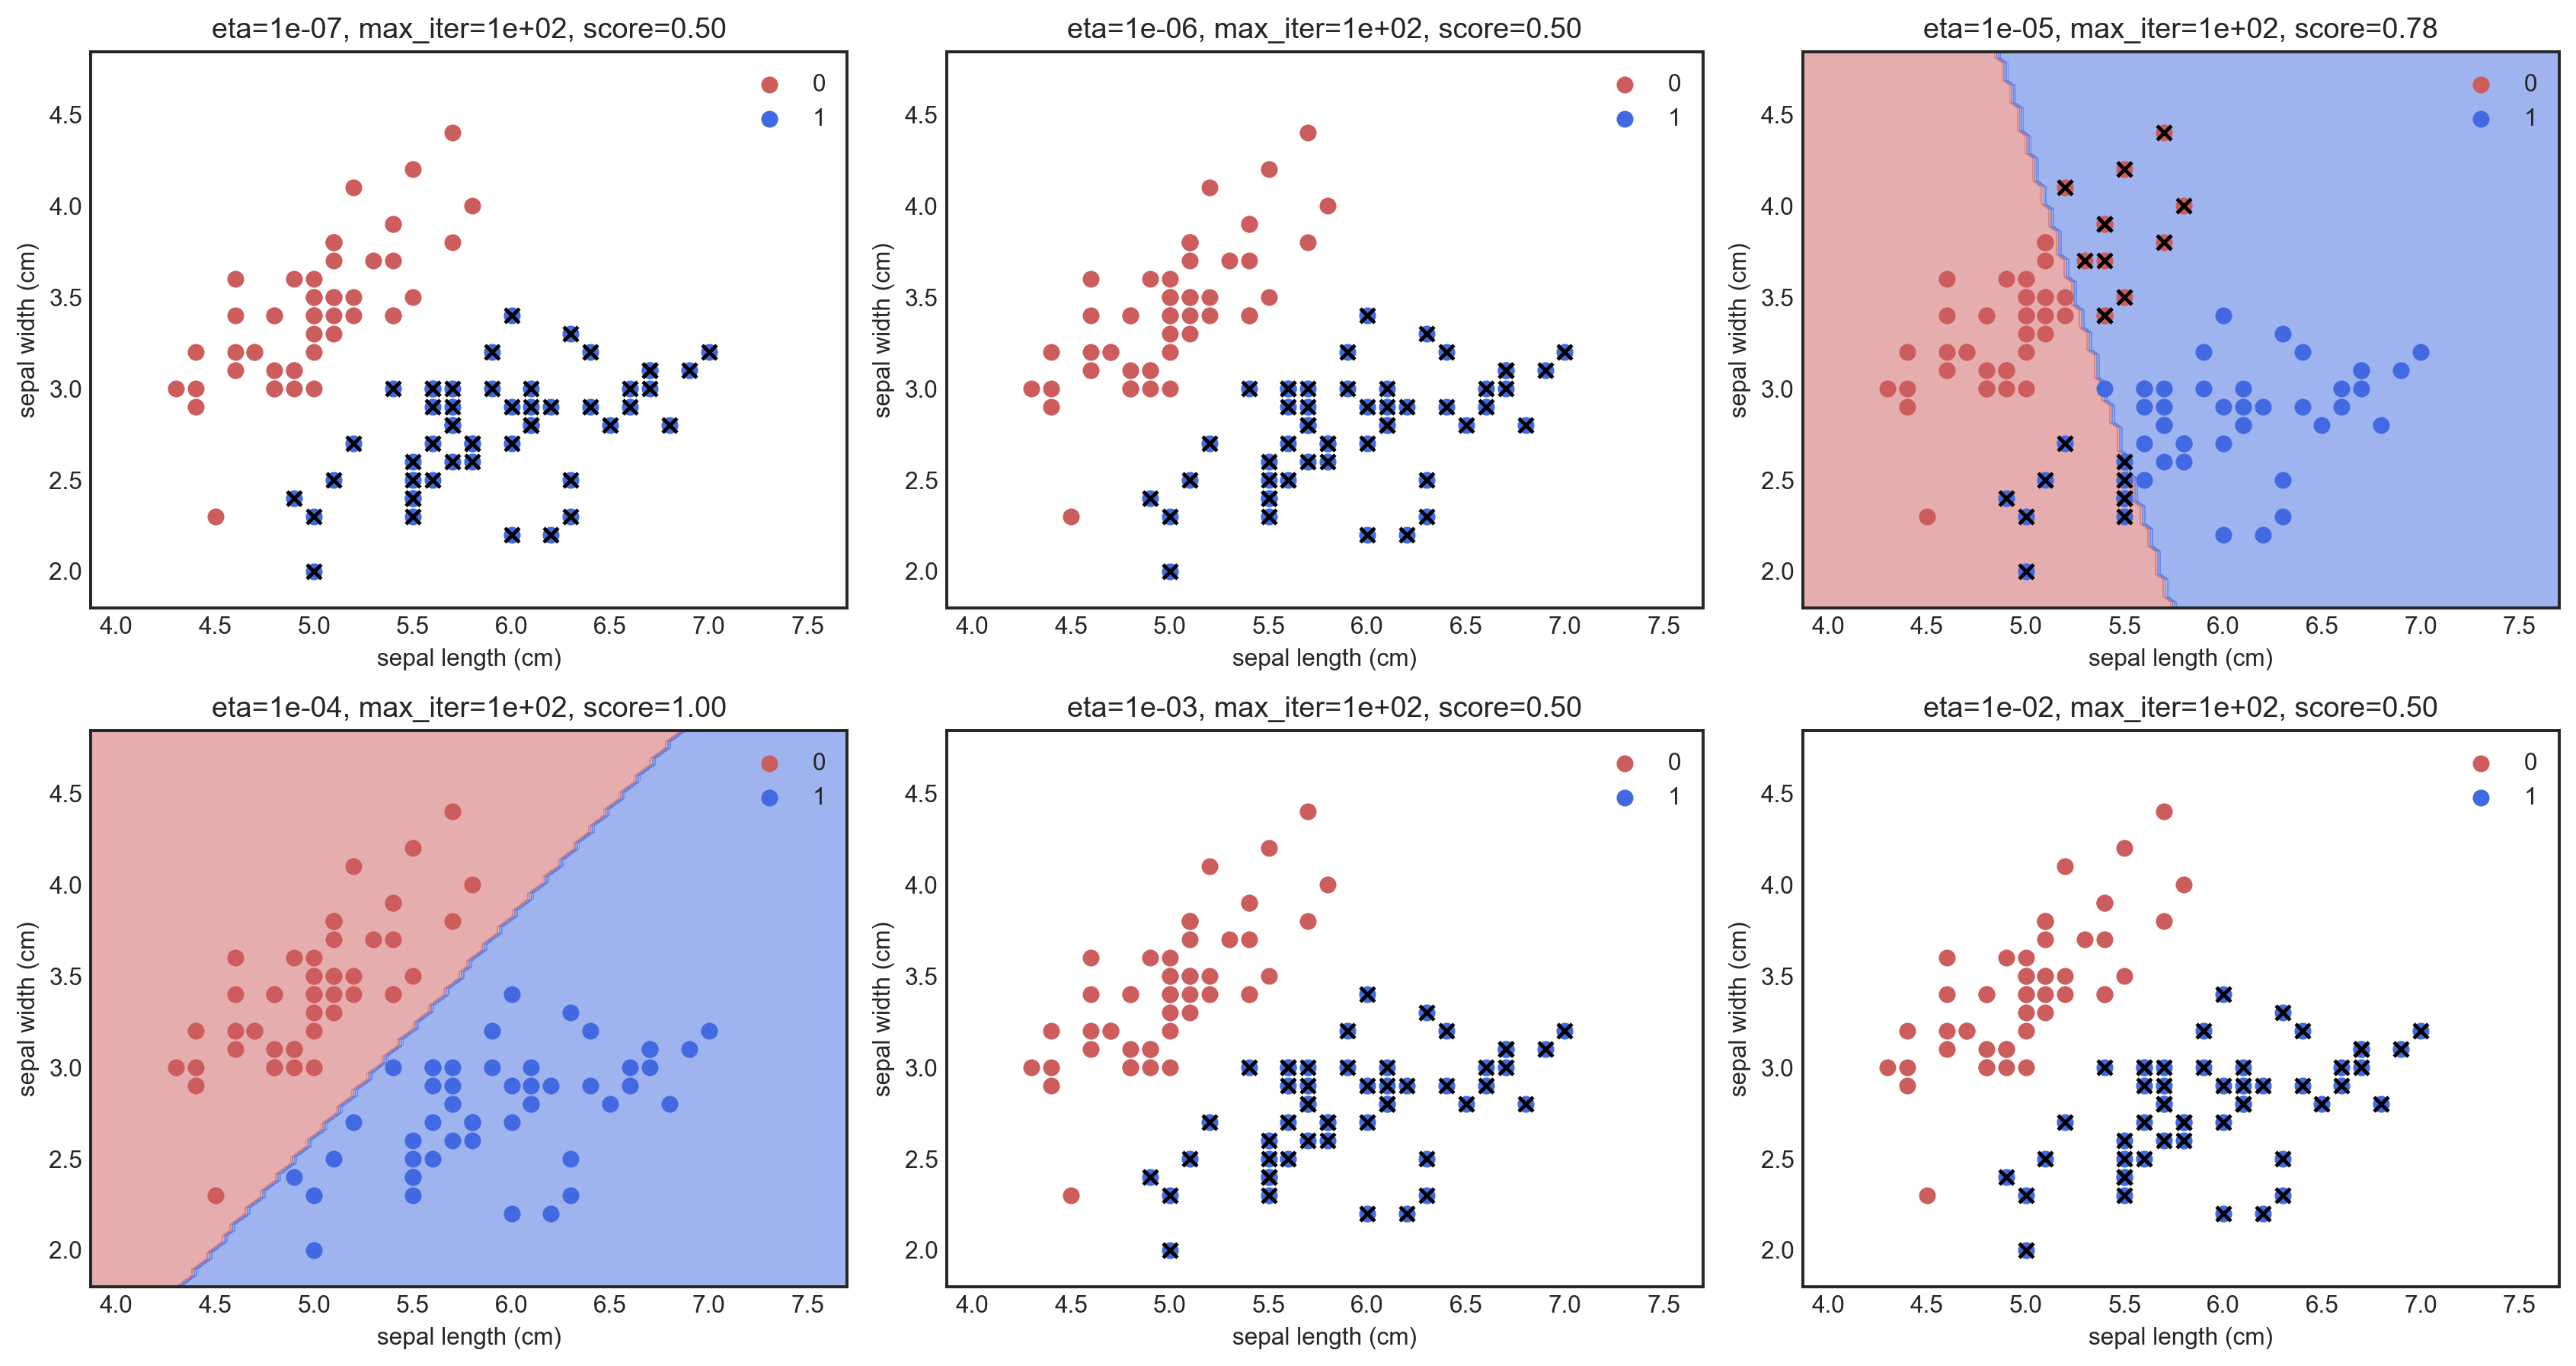

In [9]:
# Fix max_iter=100, observe the effect of learning rate on performance
fig, axes = plt.subplots(2, 3, dpi=227, figsize=(15, 8))
axes = axes.ravel()
max_iter = 100
etas = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
for idx, eta in enumerate(etas):
    clf = myAdaline(eta=eta, max_iter=max_iter)
    clf.fit(X2, y2)
    Plot_decision_regions(clf, X2, y2, ax=axes[idx])
    axes[idx].set_title(f'eta={eta:.0e}, max_iter={max_iter:.0e}, score={clf.score(X2, y2):.2f}')
    axes[idx].set_xlabel(iris.feature_names[0])
    axes[idx].set_ylabel(iris.feature_names[1])
plt.tight_layout()

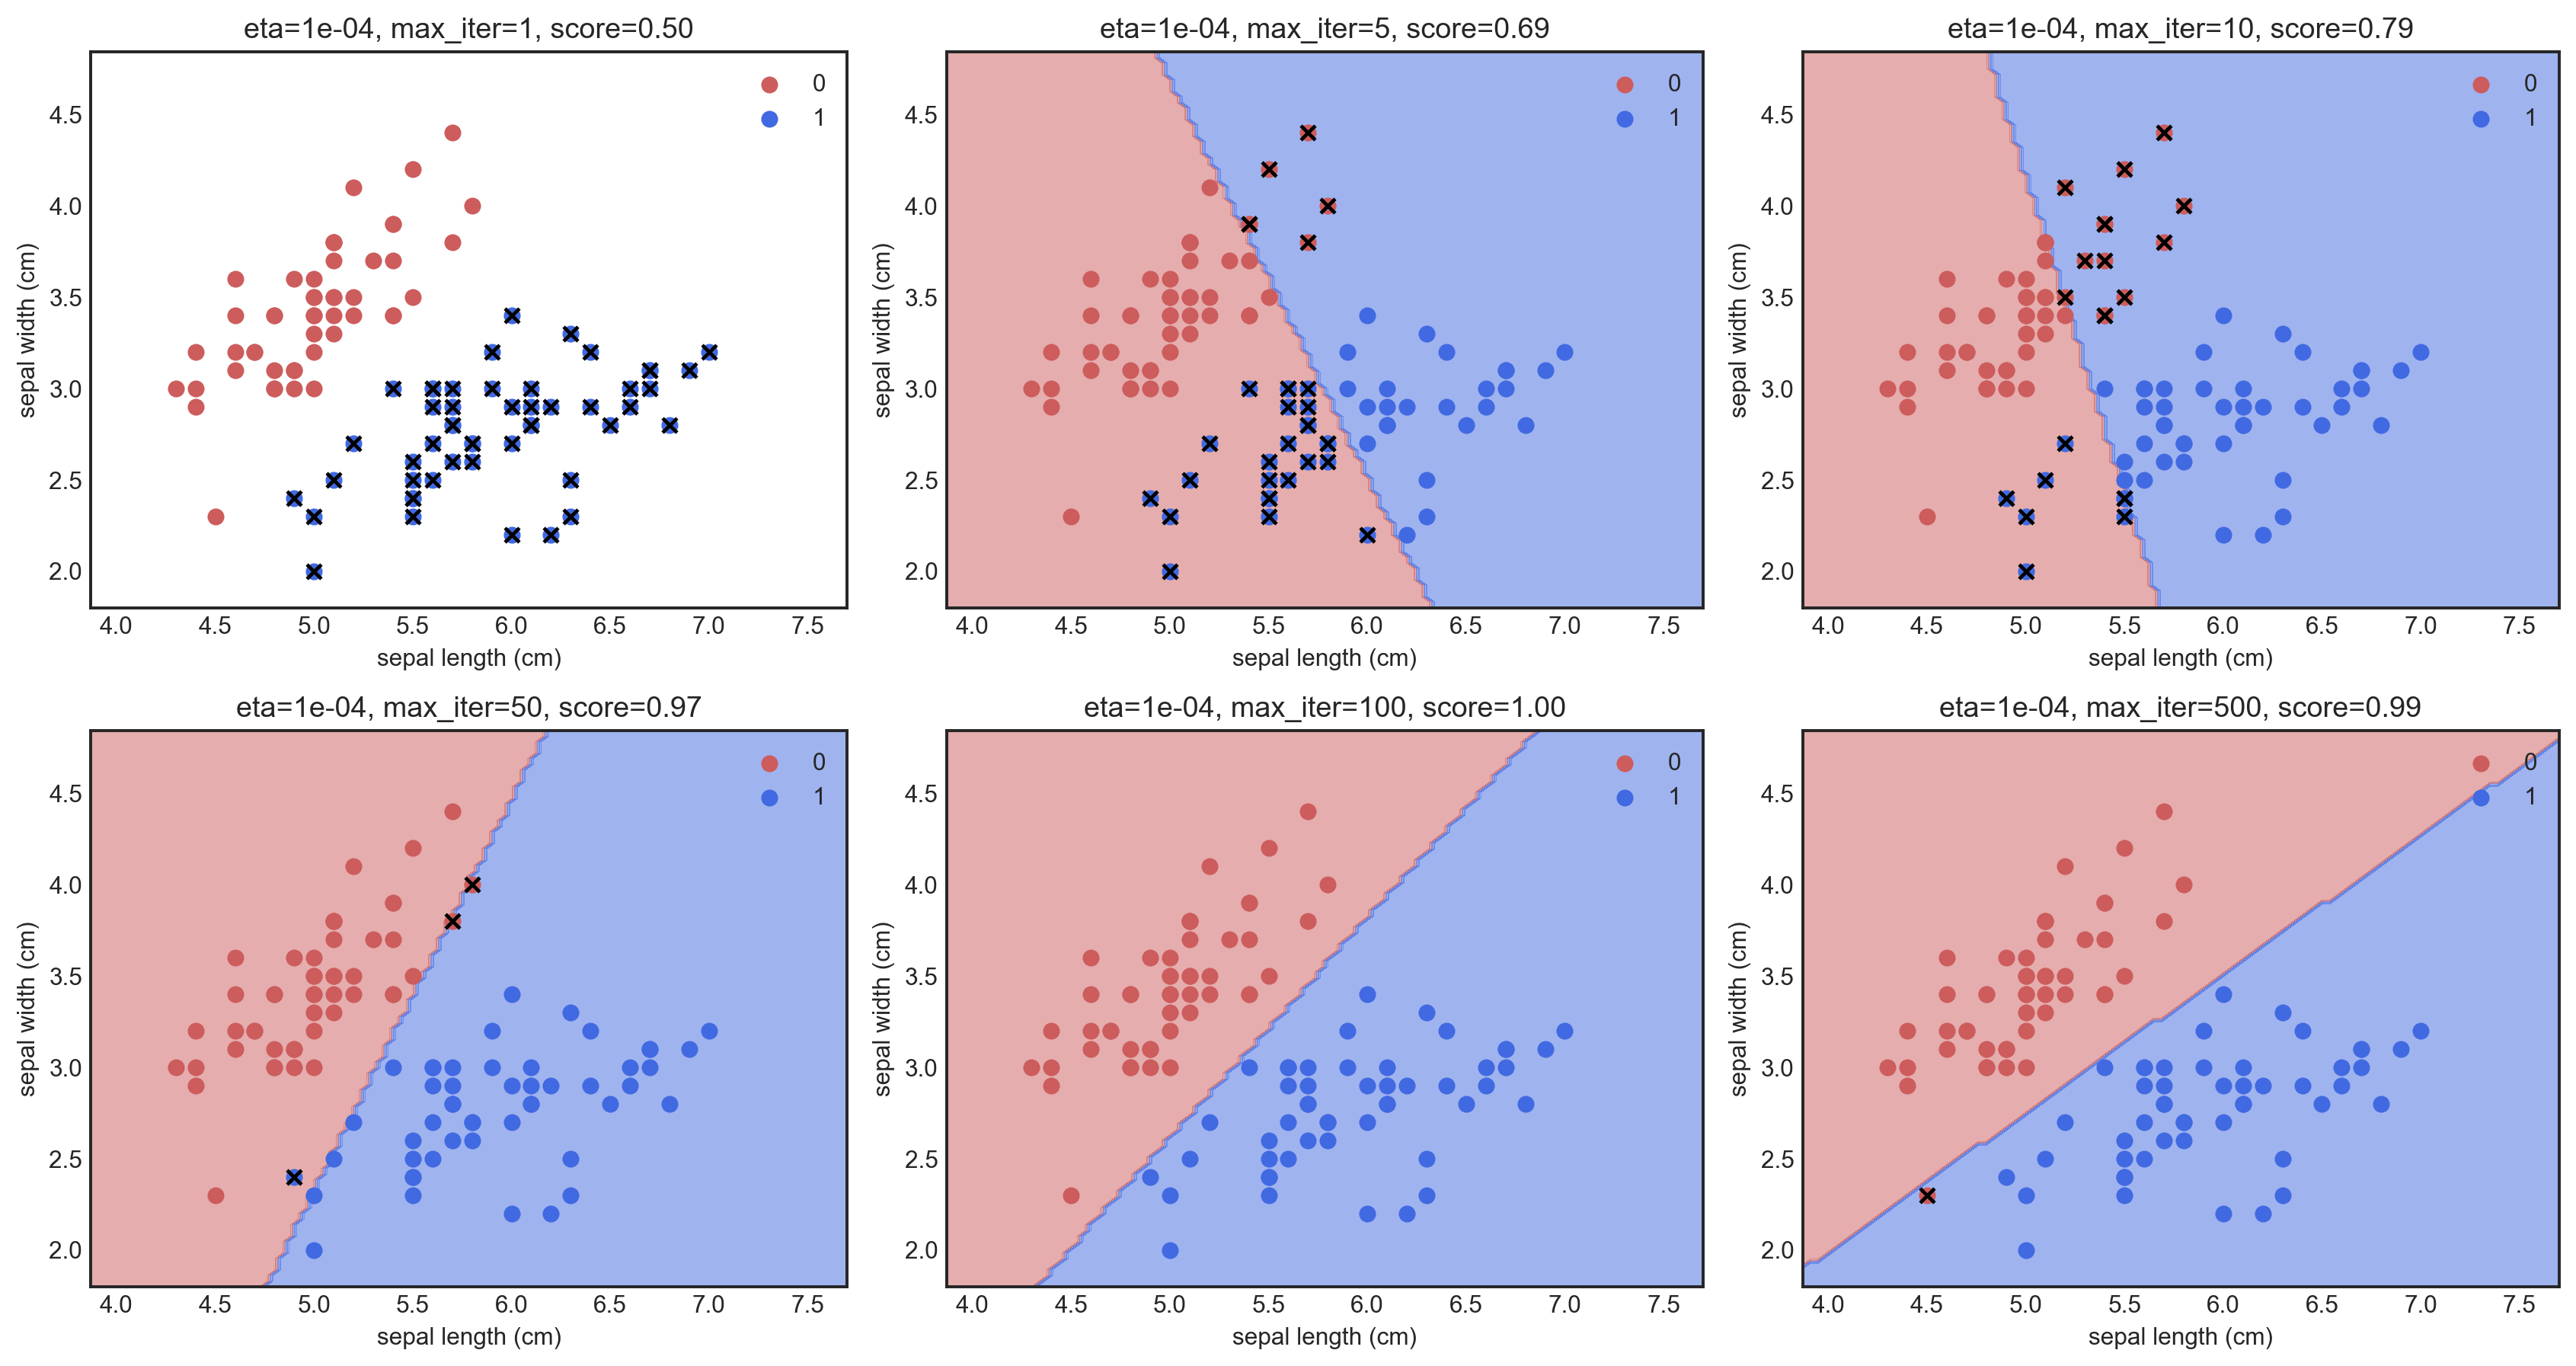

In [10]:
# Fix eta=1e-4, observe the effect of max_iter on performance
fig, axes = plt.subplots(2, 3, dpi=227, figsize=(15, 8))
axes = axes.ravel()
eta = 1e-4
iterations = [1, 5, 10, 50, 100, 500]
for idx, max_iter in enumerate(iterations):
    clf = myAdaline(eta=eta, max_iter=max_iter)
    clf.fit(X2, y2)
    Plot_decision_regions(clf, X2, y2, ax=axes[idx])
    axes[idx].set_title(f'eta={eta:.0e}, max_iter={max_iter}, score={clf.score(X2, y2):.2f}')
    axes[idx].set_xlabel(iris.feature_names[0])
    axes[idx].set_ylabel(iris.feature_names[1])
plt.tight_layout()

### Example-2B: Iris (use sklearn)
#### Classification: 2 features, 2 classes
(original dataset contain 4 features and 3 classes)

Accuracy = 0.99


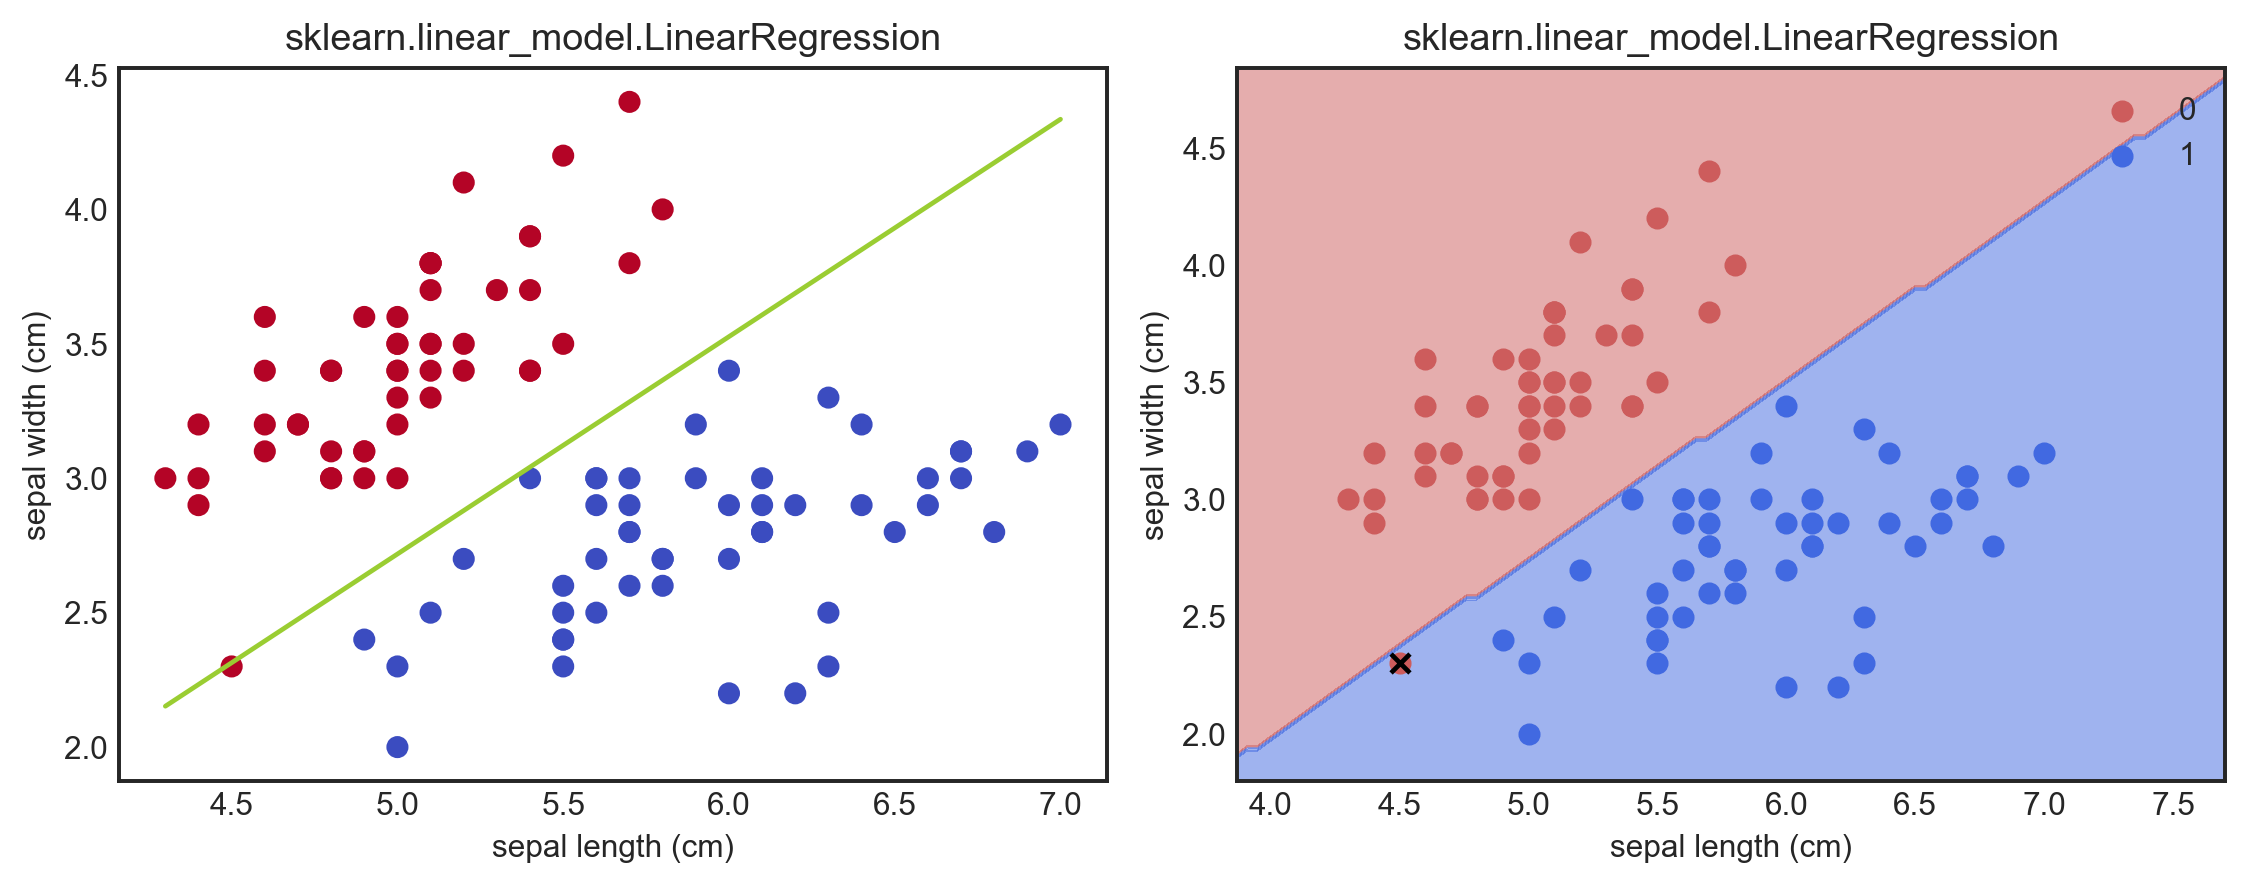

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X2, y2)

print('Accuracy =', sum((reg.predict(X2) >= 0.5).astype(np.int) == y2) / y2.size)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
axes[0].scatter(X2[:, 0], X2[:, 1], c=y2, cmap=plt.cm.coolwarm_r)

xx = np.linspace(X2[:, 0].min(), X2[:, 0].max(), 100)
yy = (0.5 - reg.intercept_ - reg.coef_[0] * xx) / reg.coef_[1]
axes[0].plot(xx, yy, c='yellowgreen')

axes[0].set_xlabel(iris.feature_names[0])
axes[0].set_ylabel(iris.feature_names[1])
axes[0].set_title('sklearn.linear_model.LinearRegression')

Plot_decision_regions(clf, X2, y2, ax=axes[1])
axes[1].set_xlabel(iris.feature_names[0])
axes[1].set_ylabel(iris.feature_names[1])
axes[1].set_title('sklearn.linear_model.LinearRegression')
plt.tight_layout()